<a href="https://colab.research.google.com/github/DasariKavya575/Airlines-Data-Analysis/blob/main/Airlines_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spotlight on Premium and Expensive Flight Routes**

**import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install pandasql

In [ ]:
import pandas as pd
import pandasql as ps

#Load csv  into Pandas DataFrame
df = pd.read_csv("/content/airlines_flights_data.csv")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


#**Data Cleaning**

In [ ]:
df.drop(columns="index", inplace=True)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


**1. Head**

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**2. Tail**

In [ ]:
df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


**3. Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


**4. Describe**

In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


**5. Null**

In [ ]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


**6. Duplicate**

In [ ]:
df[df.duplicated()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [ ]:
#import mysql.connector
#from mysql.connector import error

#*Data Visualization*



In [ ]:
import pandasql as ps
import matplotlib.pyplot as plt

#1.Price Distribution across Airlines

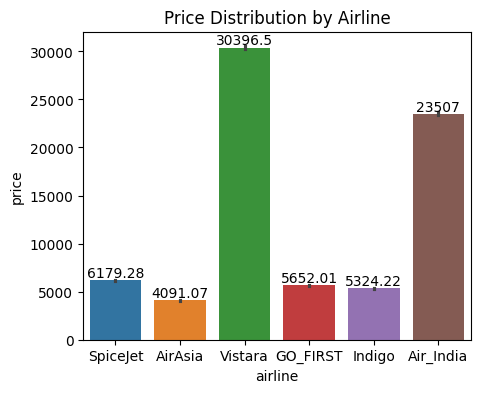

In [ ]:
#1.Price Distribution across Airlines

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
ax = sns.barplot(x='airline', y='price', data=df, hue='airline')  # capture return value in ax
plt.title('Price Distribution by Airline')

for container in ax.containers:
    ax.bar_label(container)

plt.show()


#2.Average Price: Economy vs. Business Class

all airlines averages individully


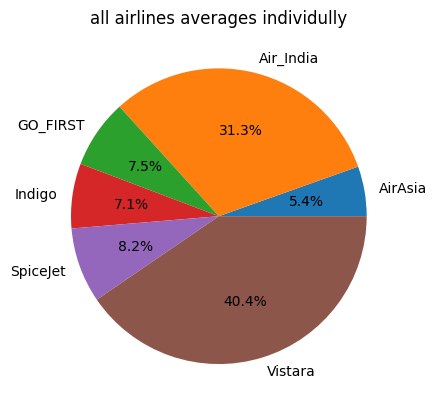

Average Price: Economy vs. Business Class 


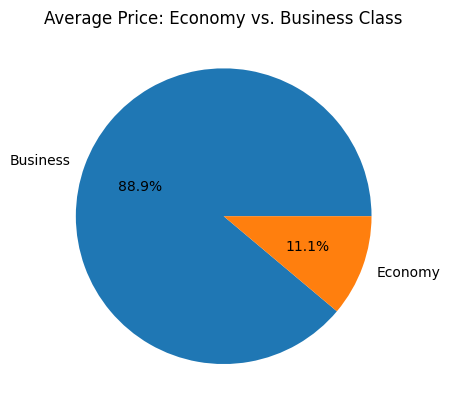

In [ ]:
#2.Average Price: Economy vs. Business Class

tip = df.groupby('airline')['price'].mean()

print( "all airlines averages individully")
values = tip.values

label = tip.index
plt.pie(values, labels= label, autopct = "%1.1f%%")
plt.title("all airlines averages individully")
plt.show()

print("Average Price: Economy vs. Business Class " )

q2=df.groupby('class')['price'].mean()
values= q2.values
label= q2.index
plt.pie(values,labels=label,autopct='%1.1f%%')
plt.title("Average Price: Economy vs. Business Class")
plt.show()

# 3.Busiest Source & Destination Cities

In [ ]:
# 3.Busiest Source & Destination Cities
#source_city
import plotly.graph_objects as go

a = df['source_city'].value_counts()
labels = a.index
value = a.values

fig = go.Figure(data=[go.Pie(labels=labels, values=value, hole=0.3)])
fig.update_traces(textinfo='percent+label', pull=[0.1, 0])
fig.update_layout(
    title_text='Busiest source cities',
    width=600,
    height=600
)

fig.show()

# destination_city
b = df['destination_city'].value_counts()
labels = b.index
value = b.values

figd = go.Figure(data=[go.Pie(labels=labels, values=value, hole=0.3)])
figd.update_traces(textinfo='percent+label', pull=[0.1, 0] )
figd.update_layout(
    title_text='Busiest Destination Cities',
    width=600,
    height=600     )

figd.show()




#4.Days Left vs. Ticket Price Trend

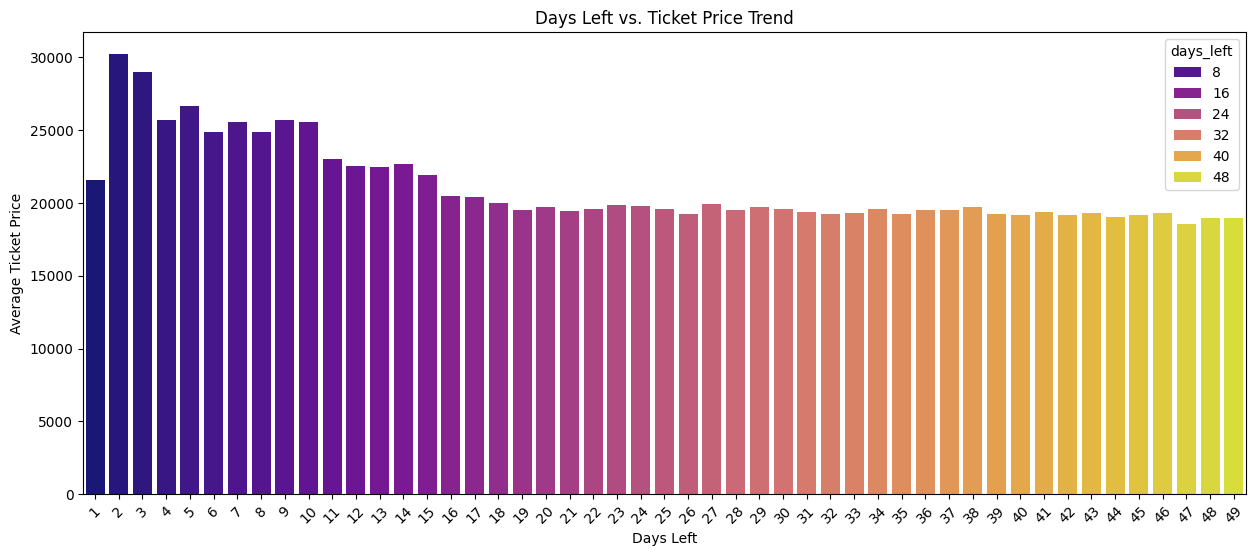

In [ ]:
#4.Days Left vs. Ticket Price Trend
plt.figure(figsize=(15,6))
sns.barplot(x='days_left', y='price', data=df,hue="days_left", dodge=False, palette='plasma', estimator='mean', errorbar=None)
plt.title("Days Left vs. Ticket Price Trend")
plt.xlabel("Days Left")
plt.ylabel("Average Ticket Price")
plt.xticks(rotation=45)
plt.show()


#5.Stops vs. Price Comparison

In [ ]:
#5.Stops vs. Price Comparison

import plotly.express as px

stops_price = df.groupby('stops')['price'].mean().sort_values(ascending=False).reset_index()
fig = px.pie(
    stops_price,
    names='stops',
    values='price',
    hole=0.4,
)
explode = [0.05 if i == 0 else 0.05 if i == 1 else 0 for i in range(len(stops_price))]
fig.update_traces(
    pull=explode,
    hoverinfo='label+percent+value',
    textinfo='label+percent'
)
fig.update_layout(
    title="Stops vs. Price Comparison (Interactive Donut Chart)",
    legend_title="Stops"
)

fig.show()


#6.Duration Impact on Ticket Pricing

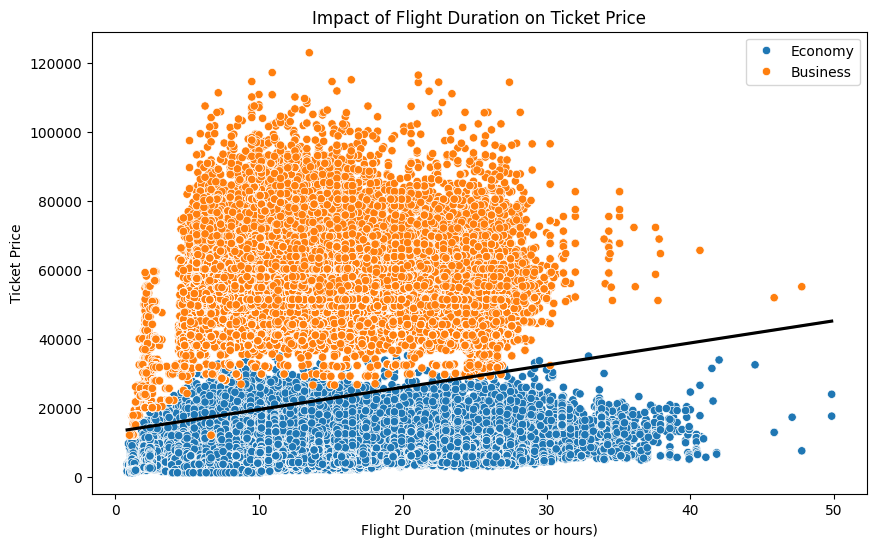

In [ ]:
#6.Duration Impact on Ticket Pricing

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='price', hue='class', data=df)
sns.regplot(x='duration', y='price', data=df, scatter=False, color='black', line_kws={'label': 'Regression Line'})
plt.title('Impact of Flight Duration on Ticket Price')
plt.xlabel('Flight Duration (minutes or hours)')
plt.ylabel('Ticket Price')
plt.legend()
plt.show()


**Sql queries:-**


# 1.The average ticket price per airline.

     airline  avg_price
0    Vistara   30396.54
1  Air_India   23507.02
2   SpiceJet    6179.28
3   GO_FIRST    5652.01
4     Indigo    5324.22
5    AirAsia    4091.07


<Figure size 1000x600 with 0 Axes>

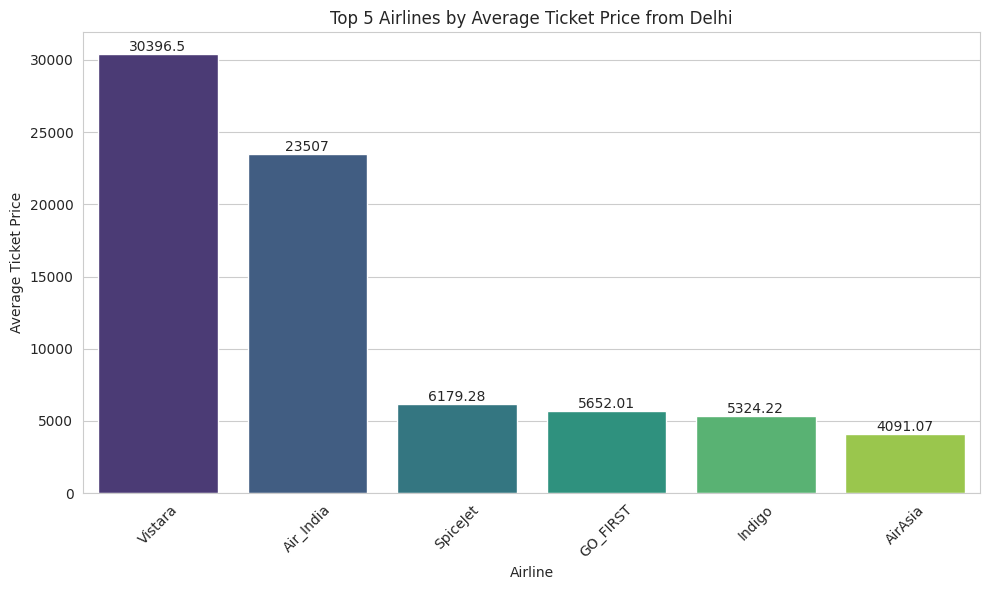

In [ ]:
#1. Find the average ticket price per airline.
import pandasql as ps
query = """
SELECT airline,Round(avg(price),2) as avg_price
from df
group by airline
order by avg_price desc;
"""

result = ps.sqldf(query,locals())
print(result)
plt.figure(figsize=(10,6))
# Plotting the average ticket price per airline.
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='airline', y='avg_price', data=result,hue='airline', palette='viridis')

plt.title('Top 5 Airlines by Average Ticket Price from Delhi')
plt.xlabel('Airline')
plt.ylabel('Average Ticket Price')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

#2.The top 5 most expensive routes (source to destination)

  source_city destination_city     price
0     Kolkata            Delhi  123071.0
1       Delhi          Kolkata  117307.0
2   Hyderabad           Mumbai  115211.0
3     Kolkata        Hyderabad  114705.0
4     Chennai           Mumbai  114704.0


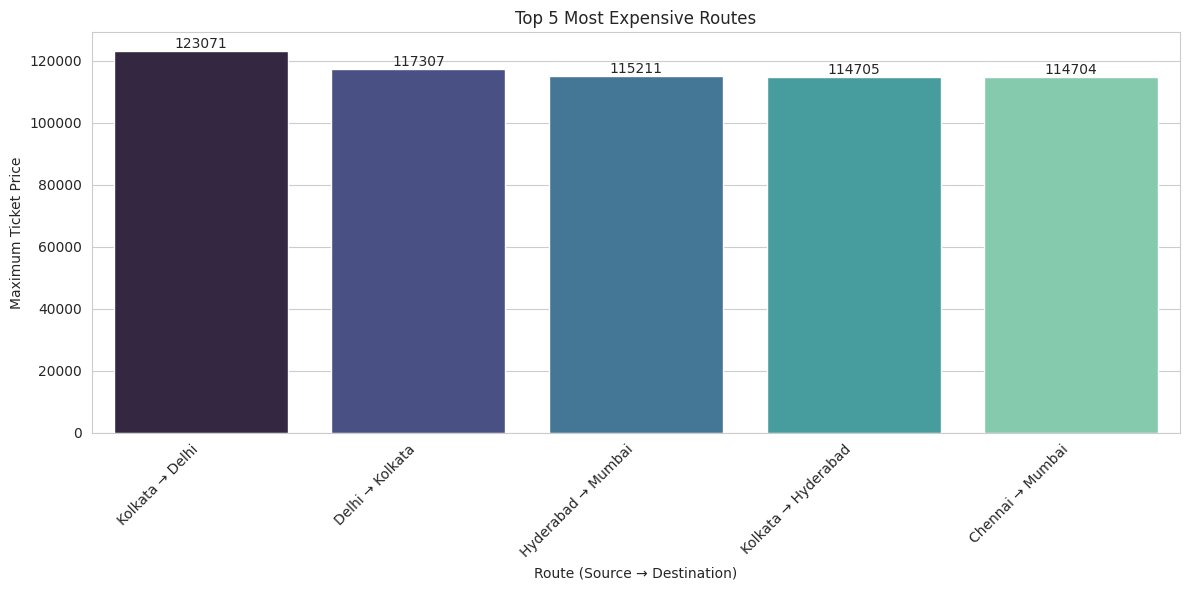

In [ ]:
 #2.List the top 5 most expensive routes (source to destination).
query2 = """
SELECT source_city, destination_city, ROUND(MAX(price),2) AS price
FROM df
GROUP BY source_city, destination_city
ORDER BY price DESC
LIMIT 5 ;
"""

result2 = ps.sqldf(query2,locals())
print(result2)
# plotting the top 5 most expensive routes (source to destination).

result2['route'] = result2['source_city'] + " → " + result2['destination_city']

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='route', y='price', data=result2, hue='route',palette='mako')

plt.title('Top 5 Most Expensive Routes')
plt.xlabel('Route (Source → Destination)')
plt.ylabel('Maximum Ticket Price')
plt.xticks(rotation=45, ha='right')

# Add value labels above bars
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


#3.airline offers the lowest average ticket price for Business class

     airline  avg_price
0  Air_India   47131.04


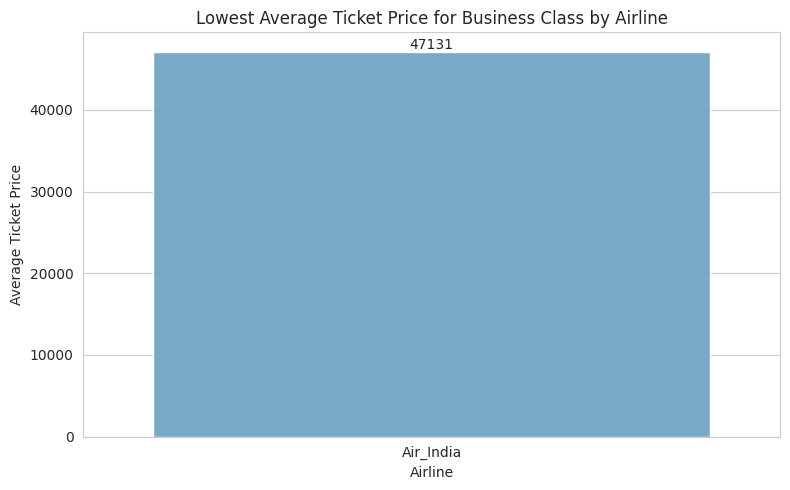

In [ ]:
#3.Which airline offers the lowest average ticket price for Business class?
query3 = """
SELECT airline, ROUND(AVG(price),2) AS avg_price
FROM df
WHERE class = "Business"
GROUP BY airline
ORDER BY avg_price ASC
LIMIT 1;
"""

result3 = ps.sqldf(query3, locals())
print(result3)
# plotting airline offers the lowest average ticket price for Business class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='airline', y='avg_price', data=result3,hue='airline',palette='Blues')

plt.title('Lowest Average Ticket Price for Business Class by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Ticket Price')

# Add value label on the single bar
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()




#4.Find routes with more than 50 flights and their average ticket prices

   source_city destination_city  total_flights  avg_price
0    Bangalore          Chennai           6410   23321.85
1    Bangalore            Delhi          13756   17723.31
2    Bangalore        Hyderabad           8928   21226.12
3    Bangalore          Kolkata          10028   23500.06
4    Bangalore           Mumbai          12939   23128.62
5      Chennai        Bangalore           6493   25081.85
6      Chennai            Delhi           9783   18981.86
7      Chennai        Hyderabad           6103   21591.35
8      Chennai          Kolkata           6983   22669.93
9      Chennai           Mumbai           9338   22765.85
10       Delhi        Bangalore          14012   17880.22
11       Delhi          Chennai          10780   19369.88
12       Delhi        Hyderabad           9328   17347.29
13       Delhi          Kolkata          11934   20566.41
14       Delhi           Mumbai          15289   19355.83
15   Hyderabad        Bangalore           7854   21347.18
16   Hyderabad

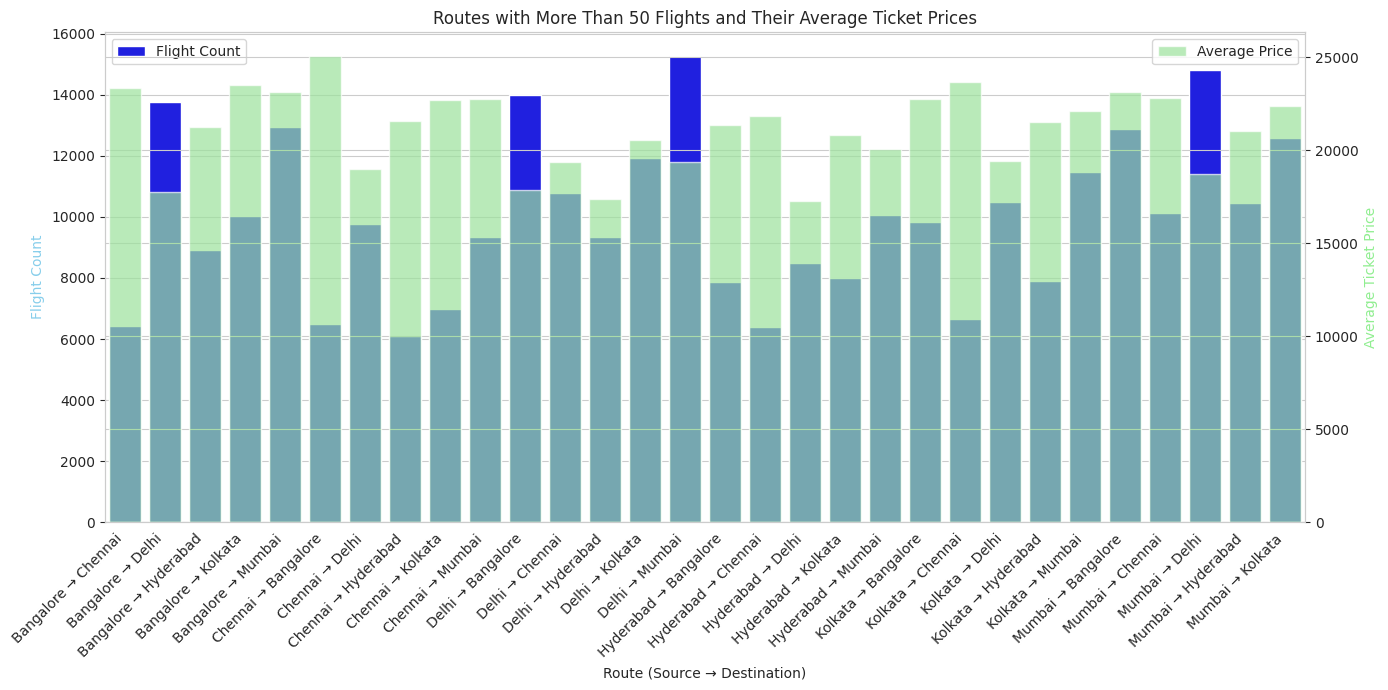

In [ ]:
#4.Find routes with more than 50 flights and their average ticket prices.
query4 = """
SELECT source_city, destination_city, COUNT(*) AS total_flights, ROUND(AVG(price),2) AS
avg_price
FROM df
GROUP BY source_city, destination_city
HAVING COUNT(*) > 50;
"""
result4 = ps.sqldf(query4,locals())
print(result4)
# plotting routes with more than 50 flights and their average ticket prices
result4['route'] = result4['source_city'] + " → " + result4['destination_city']

plt.figure(figsize=(14, 7))

# Plot flight_count bars
sns.barplot(x='route', y='total_flights', data=result4, color='blue', label='Flight Count')

# Plot average_price bars on secondary y-axis for clear visualization
ax1 = plt.gca()
ax2 = ax1.twinx()

sns.barplot(x='route', y='avg_price', data=result4, color='lightgreen', alpha=0.7, label='Average Price', ax=ax2)

ax1.set_xlabel('Route (Source → Destination)')
ax1.set_ylabel('Flight Count', color='skyblue')
ax2.set_ylabel('Average Ticket Price', color='lightgreen')
ax1.set_xticks(range(len(result4['route'])))
ax1.set_xticklabels(result4['route'], rotation=45, ha='right')


# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Routes with More Than 50 Flights and Their Average Ticket Prices')
plt.tight_layout()
plt.show()


#5.Compare average price difference between Economy and Business class per airline

     airline  avg_economy  avg_business    price_diff
0    AirAsia  4091.072742           NaN           NaN
1  Air_India  7313.682169  47131.039212 -39817.357044
2   GO_FIRST  5652.007595           NaN           NaN
3     Indigo  5324.216303           NaN           NaN
4   SpiceJet  6179.278881           NaN           NaN
5    Vistara  7806.943645  55477.027777 -47670.084132


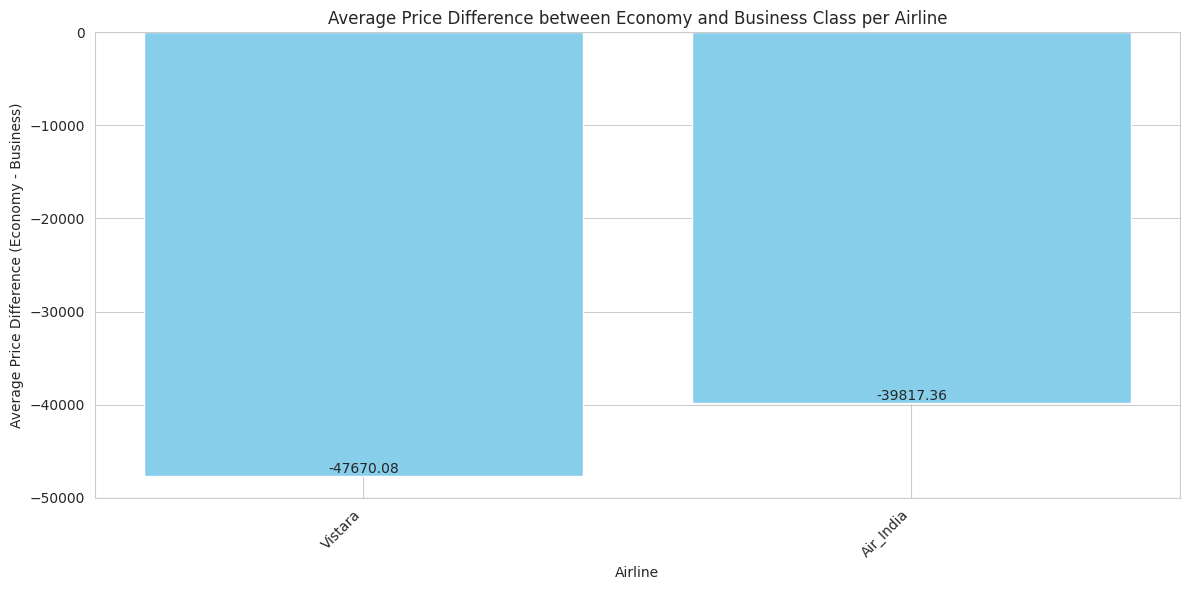

In [ ]:
#5.Compare average price difference between Economy and Business class per airline.
query5 = """
SELECT airline,
AVG(CASE WHEN class = "Economy" THEN price END) AS
avg_economy,
AVG(CASE WHEN class= "Business" THEN price END) AS avg_business,
(AVG(CASE WHEN class = "Economy" THEN price END) -
AVG(CASE WHEN class = "Business" THEN price END))AS price_diff
FROM df
GROUP BY airline;
"""
result5 = ps.sqldf(query5,locals())
print(result5)
# Plotting average price difference between Economy and Business class per airline
result5_sorted = result5.sort_values(by='price_diff')

plt.figure(figsize=(12, 6))
bars = plt.bar(result5_sorted['airline'], result5_sorted['price_diff'], color='skyblue')

plt.xlabel('Airline')
plt.ylabel('Average Price Difference (Economy - Business)')
plt.title('Average Price Difference between Economy and Business Class per Airline')
plt.xticks(rotation=45, ha='right')

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


#6.Which cities have the most incoming flights

  destination_city  Incoming_flights
0           Mumbai             59097
1            Delhi             57360
2        Bangalore             51068
3          Kolkata             49534
4        Hyderabad             42726
5          Chennai             40368


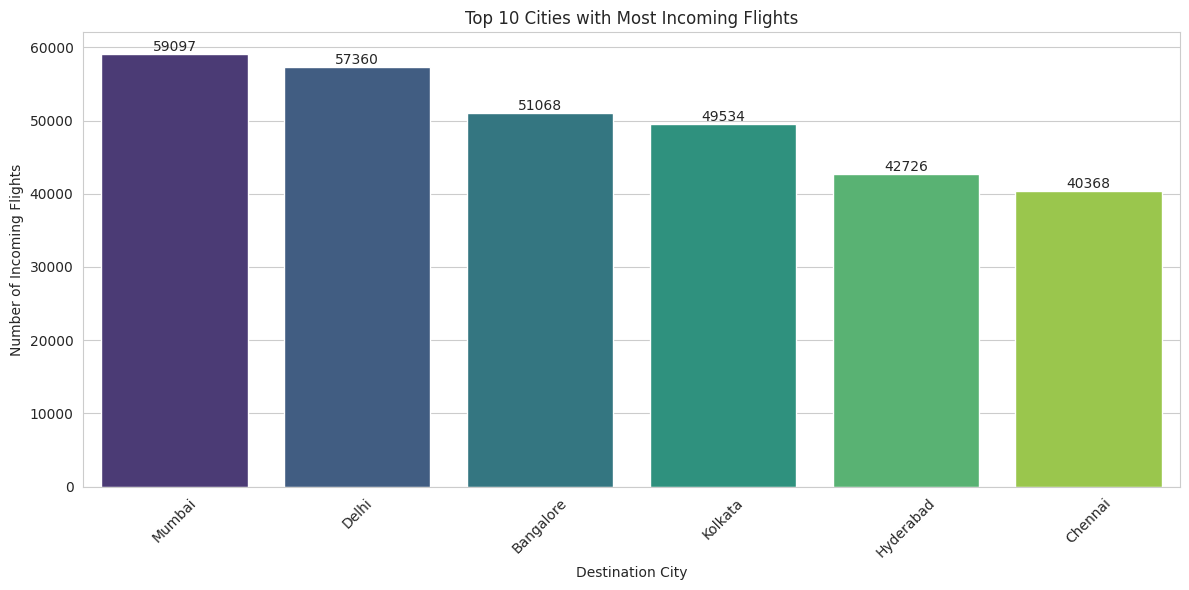

In [ ]:
#6.Which cities have the most incoming flights?
query6 = """
SELECT destination_city,count(*) as Incoming_flights
from df
group by destination_city
order by Incoming_flights desc;
"""
result6 = ps.sqldf(query6,locals())
print(result6)
# plotting the cities have the most incoming_flights

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='destination_city', y='Incoming_flights', data=result6.head(10), hue='destination_city',palette='viridis')

plt.title('Top 10 Cities with Most Incoming Flights')
plt.xlabel('Destination City')
plt.ylabel('Number of Incoming Flights')
plt.xticks(rotation=45)
# Add values above bars
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

#7.Which cities have the most outgoing flights?

  source_city  outgoing_flights
0       Delhi             61343
1      Mumbai             60896
2   Bangalore             52061
3     Kolkata             46347
4   Hyderabad             40806
5     Chennai             38700


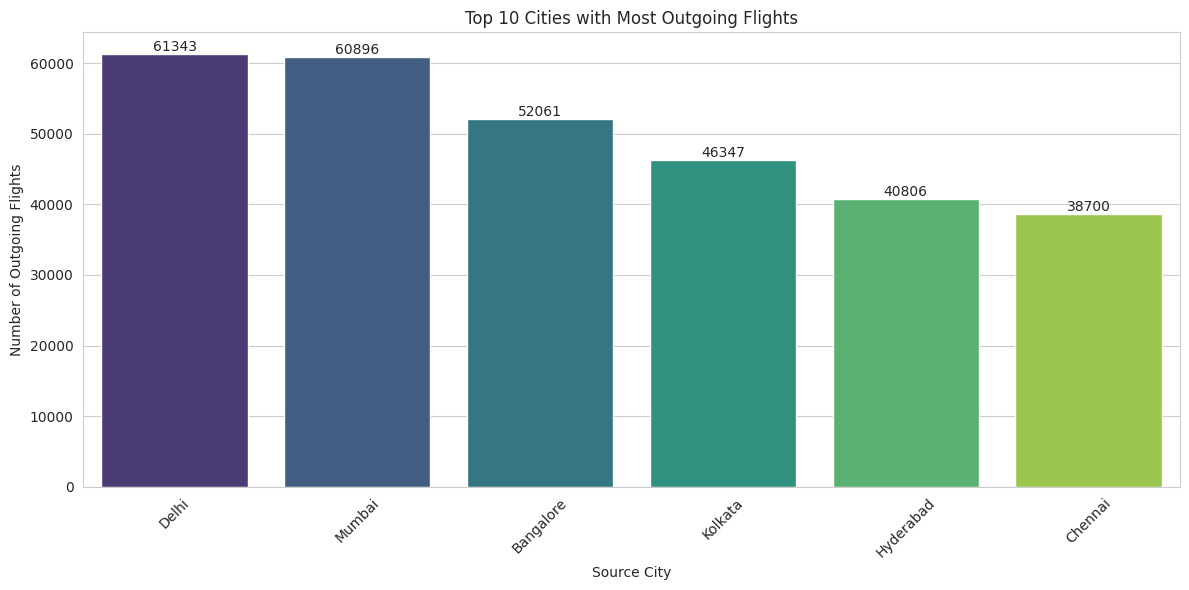

In [ ]:
#7.Which cities have the most outgoing flights?
query7 = """
SELECT  source_city,count(*) as outgoing_flights
from df
group by source_city
order by outgoing_flights desc;
"""
result7 = ps.sqldf(query7,locals())
print(result7)
# Plotting the cities  have the most outgoing flights

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='source_city', y='outgoing_flights', data=result7.head(10),hue='source_city', palette='viridis')

plt.title('Top 10 Cities with Most Outgoing Flights')
plt.xlabel('Source City')
plt.ylabel('Number of Outgoing Flights')
plt.xticks(rotation=45)

# Add values above bars
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

#8.Find the busiest route (most number of flights)

   source_city destination_city  no_of_flights
0        Delhi           Mumbai          15289
1       Mumbai            Delhi          14809
2        Delhi        Bangalore          14012
3    Bangalore            Delhi          13756
4    Bangalore           Mumbai          12939
5       Mumbai        Bangalore          12885
6       Mumbai          Kolkata          12602
7        Delhi          Kolkata          11934
8      Kolkata           Mumbai          11467
9        Delhi          Chennai          10780
10     Kolkata            Delhi          10506
11      Mumbai        Hyderabad          10470
12      Mumbai          Chennai          10130
13   Hyderabad           Mumbai          10064
14   Bangalore          Kolkata          10028
15     Kolkata        Bangalore           9824
16     Chennai            Delhi           9783
17     Chennai           Mumbai           9338
18       Delhi        Hyderabad           9328
19   Bangalore        Hyderabad           8928
20   Hyderaba

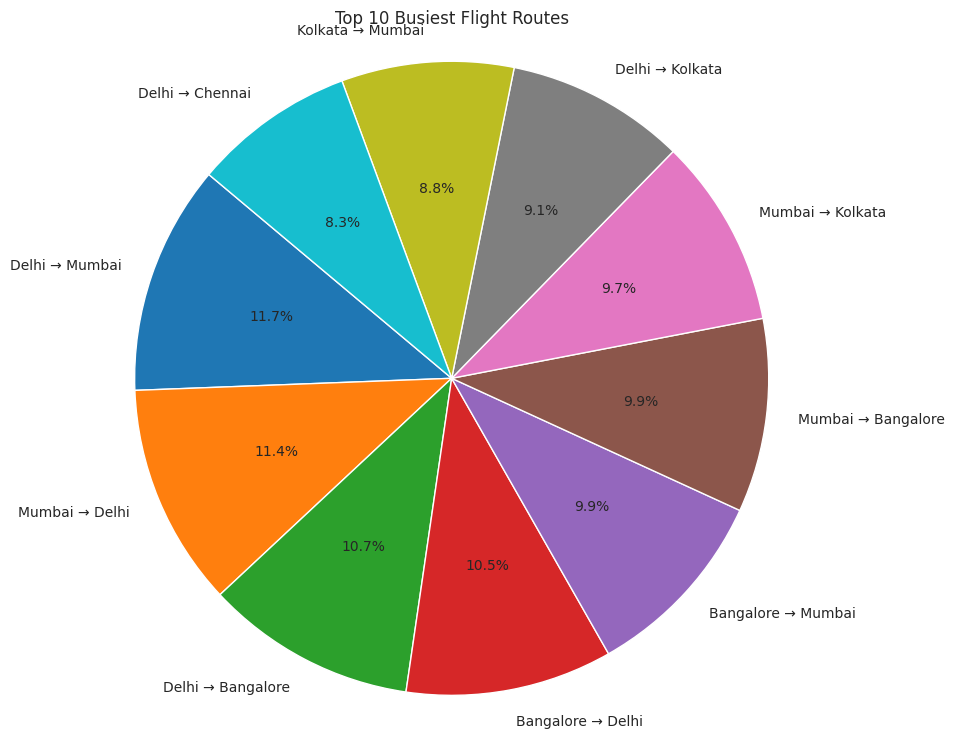

In [ ]:
#8.Find the busiest route (most number of flights).
query8 = """
SELECT source_city, destination_city, COUNT(*) AS no_of_flights
FROM df
GROUP BY source_city, destination_city
ORDER BY no_of_flights DESC
"""

result8 = ps.sqldf(query8,locals())
print(result8)
# plotting Busiest route

result8['route'] = result8['source_city'] + " → " + result8['destination_city']

# Limit to top 10 busiest routes
top_routes = result8.head(10)

plt.figure(figsize=(9, 9))
plt.pie(top_routes['no_of_flights'], labels=top_routes['route'], autopct='%1.1f%%', startangle=140)

plt.title('Top 10 Busiest Flight Routes')
plt.axis('equal')
plt.show()


#9.List the top 3 airlines with cheapest average prices for each route.

   source_city destination_city   airline  avg_price
0    Bangalore          Chennai   AirAsia    2073.04
1    Bangalore          Chennai    Indigo    2363.33
2    Bangalore          Chennai  SpiceJet    2613.31
3    Bangalore            Delhi   AirAsia    4807.09
4    Bangalore            Delhi  GO_FIRST    5524.70
..         ...              ...       ...        ...
85      Mumbai        Hyderabad  GO_FIRST    4603.87
86      Mumbai        Hyderabad    Indigo    5870.95
87      Mumbai          Kolkata   AirAsia    3977.94
88      Mumbai          Kolkata  GO_FIRST    6106.50
89      Mumbai          Kolkata  SpiceJet    7065.21

[90 rows x 4 columns]


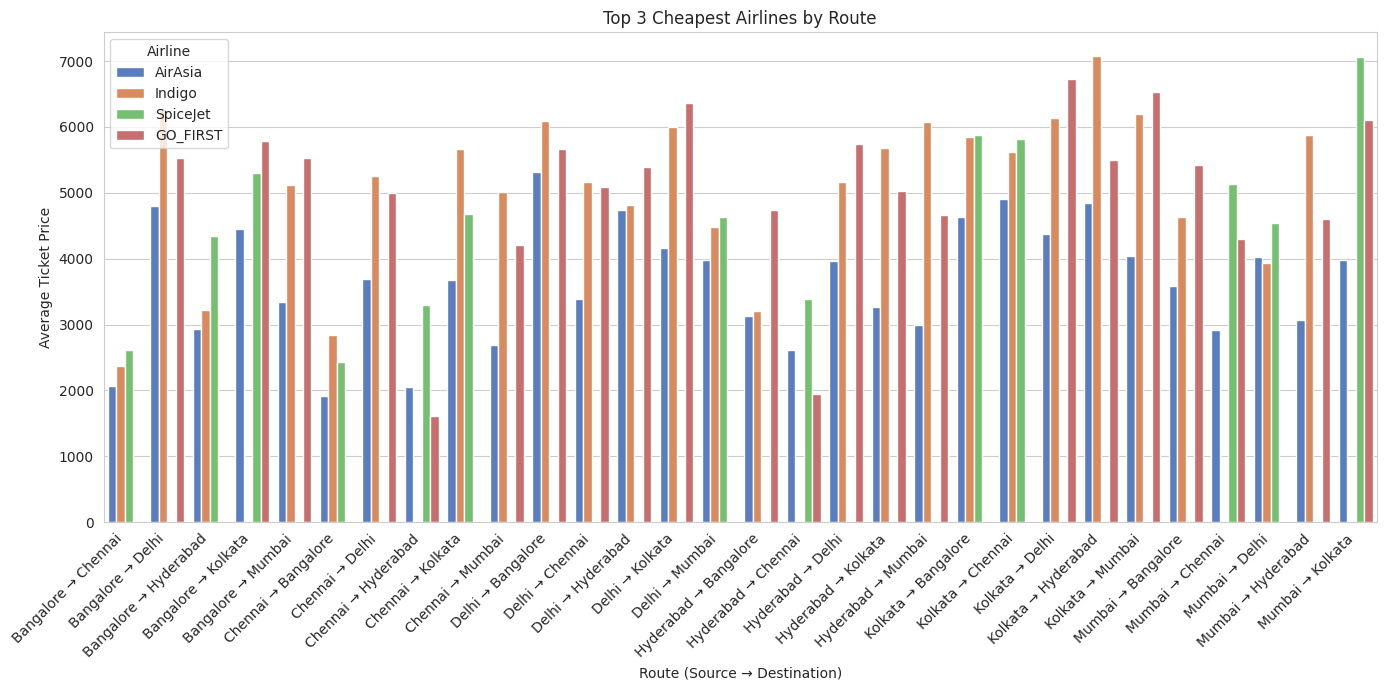

In [ ]:
#9.List the top 3 airlines with cheapest average prices for each route.

query9 = """
SELECT source_city,
       destination_city,
       airline,
       ROUND(AVG(price),2) AS avg_price
FROM df
GROUP BY source_city, destination_city, airline
ORDER BY source_city, destination_city, avg_price ASC;
"""
result9 = ps.sqldf(query9, locals())
top3_cheapest = result9.groupby(['source_city','destination_city']).head(3).reset_index(drop=True)
print(top3_cheapest)
# Plotting 3airlines with Cheapest average prices for each route
top3_cheapest['route'] = top3_cheapest['source_city'] + " → " + top3_cheapest['destination_city']

plt.figure(figsize=(14, 7))
sns.barplot(x='route', y='avg_price', hue='airline', data=top3_cheapest, errorbar=None, palette='muted')

plt.title('Top 3 Cheapest Airlines by Route')
plt.xlabel('Route (Source → Destination)')
plt.ylabel('Average Ticket Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Airline')
plt.tight_layout()
plt.show()


#10.Find flights with duration more than 5 hours but priced below average.

In [ ]:
#10.Find flights with duration more than 5 hours but priced below average.

query10 = """
SELECT flight, duration, price
FROM df
WHERE duration > 5 AND price < (SELECT AVG(price) FROM df)
ORDER BY price ASC;
"""

result10 = ps.sqldf(query10, locals())
print(result10)


         flight  duration  price
0       6E-6137      5.25   1105
1       6E-6113      5.92   1105
2        6E-847      6.67   1105
3        6E-804      6.75   1105
4       6E-6113      7.00   1105
...         ...       ...    ...
169086   AI-885     11.50  20865
169087   UK-995      6.58  20865
169088   UK-852     10.08  20867
169089   AI-773     17.67  20874
169090   SG-406     10.75  20875

[169091 rows x 3 columns]


#11.Which flight class shows the highest average price variation (std deviation)

      class  price_stddev
0  Business  12969.314606
1   Economy   3743.519517


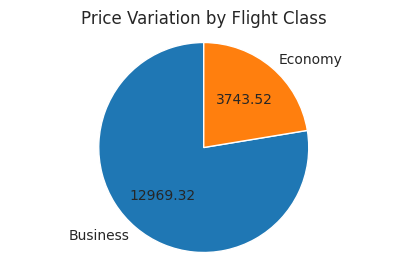

In [ ]:
#11.Which flight class shows the highest average price variation (std deviation)?

df_std = df.groupby(["class"])["price"].agg(price_stddev="std").reset_index()

query11 = """
SELECT class, price_stddev
FROM df_std
ORDER BY price_stddev DESC;
"""

result11 = ps.sqldf(query11, locals())
print(result11)
#  Pie chart from result11
import matplotlib.pyplot as plt

labels = result11['class']
sizes = result11['price_stddev']

plt.figure(figsize=(5, 3))
plt.pie(sizes, labels=labels, autopct=lambda pct: f'{pct*sum(sizes)/100:.2f}', startangle=90)
plt.title('Price Variation by Flight Class')
plt.axis('equal')
plt.show()


#12. Find how ticket prices vary with number of days left before departure.

    days_left     avg_price
0           1  21591.867151
1           2  30211.299801
2           3  28976.083569
3           4  25730.905653
4           5  26679.773368
5           6  24856.493902
6           7  25588.367351
7           8  24895.883995
8           9  25726.246072
9          10  25572.819134
10         11  22990.656070
11         12  22505.803322
12         13  22498.885384
13         14  22678.002363
14         15  21952.540852
15         16  20503.546237
16         17  20386.353949
17         18  19987.445168
18         19  19507.677375
19         20  19699.983390
20         21  19430.494058
21         22  19590.667385
22         23  19840.913451
23         24  19803.908896
24         25  19571.641791
25         26  19238.290278
26         27  19950.866195
27         28  19534.986047
28         29  19744.653119
29         30  19567.580834
30         31  19392.706612
31         32  19258.135308
32         33  19306.271739
33         34  19562.008266
34         35  19255

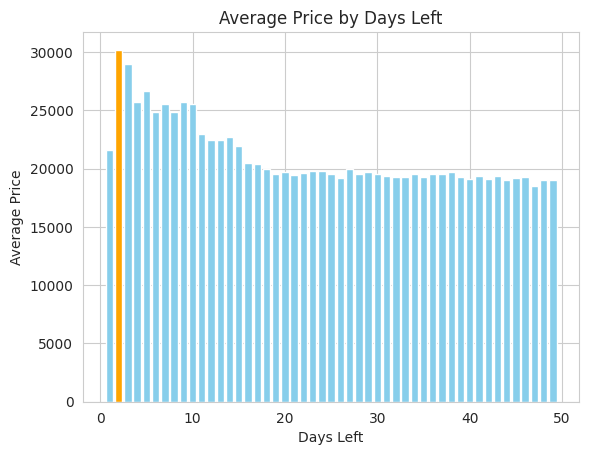

In [ ]:
#12. Find how ticket prices vary with number of days left before departure.

query12="""
 SELECT days_left, AVG(price) AS avg_price
FROM df
GROUP BY days_left
ORDER BY days_left ASC;
"""
result12 = ps.sqldf(query12, locals())
print(result12)
# 12 Bar plot with highlight for max average price
colors = ['orange' if val == result12["avg_price"].max() else 'skyblue' for val in result12["avg_price"]]
plt.bar(result12["days_left"], result12["avg_price"], color=colors)
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.title("Average Price by Days Left")
plt.show()


#13.Which time of day (Morning, Evening, etc.) has the highest average ticket price?

  time_of_day  avg_price
0       Night   23062.15


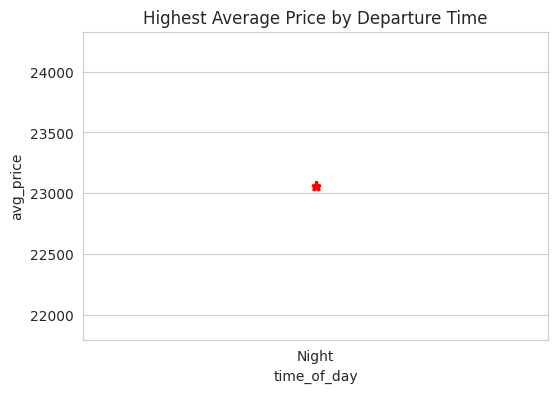

In [ ]:
#13.Which time of day (Morning, Evening, etc.) has the highest average ticket price?
query13 = """
SELECT departure_time AS time_of_day, ROUND(AVG(price), 2) AS avg_price
FROM df
GROUP BY departure_time
ORDER BY avg_price DESC
limit 1;
"""

result13 = ps.sqldf(query13, locals())
print(result13)
# plotting time of day (Morning, Evening, etc.) has the highest average ticket price
plt.figure(figsize=(6,4))
sns.pointplot(
    data=result13,
    x="time_of_day",
    y="avg_price",
    markers="*",
    color="red",

)

plt.title("Highest Average Price by Departure Time")
plt.xlabel("time_of_day")
plt.ylabel("avg_price")
plt.show()




#14.Find Price trends by airline and travel class

In [ ]:
 #14.Find Price trends by airline and travel class
query='''
select
   airline,class,count(*) as ticket_count,avg(price) as avg_price,
   min(price) as min_price,max(price) as max_price
from df
group by airline,class
order by airline,class;
'''
result14=ps.sqldf(query,locals())
print(result14)

     airline     class  ticket_count     avg_price  min_price  max_price
0    AirAsia   Economy         16098   4091.072742       1105      31917
1  Air_India  Business         32898  47131.039212      12000      90970
2  Air_India   Economy         47994   7313.682169       1526      42349
3   GO_FIRST   Economy         23173   5652.007595       1105      32803
4     Indigo   Economy         43120   5324.216303       1105      31952
5   SpiceJet   Economy          9011   6179.278881       1106      34158
6    Vistara  Business         60589  55477.027777      17604     123071
7    Vistara   Economy         67270   7806.943645       1714      37646


#15.Compare the airlines average prices for non-stop vs. 1-stop vs. 2+ stops flights.

In [ ]:
#15.Compare the airlines average prices for non-stop vs. 1-stop vs. 2+ stops flights.

query ="""
 SELECT AIRLINE,
 CASE WHEN STOPS = 'zero' THEN 'zero' ELSE "--" END AS ZERO_STOPS,
 CASE WHEN STOPS = 'one' THEN 'one' ELSE "--" END AS ONE_STOP,
 CASE WHEN STOPS = 'two_or_more' THEN 'two_or_more' ELSE "--" END AS TWO_OR_MORE_STOPS,
 AVG(PRICE) AS AVG_PRICE FROM df
 GROUP BY AIRLINE, STOPS
 ORDER BY AIRLINE, AVG(PRICE), STOPS DESC;
 """
result = ps.sqldf(query,locals())
display(result)


,airline,ZERO_STOPS,ONE_STOP,TWO_OR_MORE_STOPS,AVG_PRICE
0,AirAsia,zero,--,--,3747.960970
1,AirAsia,--,one,--,4096.963741
2,AirAsia,--,--,two_or_more,4432.956367
3,Air_India,--,--,two_or_more,13771.177062
4,Air_India,zero,--,--,14403.191918
5,Air_India,--,one,--,24805.782885
6,GO_FIRST,zero,--,--,3526.924915
7,GO_FIRST,--,one,--,5972.272755
8,GO_FIRST,--,--,two_or_more,7107.708642
9,Indigo,zero,--,--,4023.049037


#**Key Findings**

**1. Learnings from Data & Business Analysis**

* Price Distribution of Flights → Identified how ticket prices vary across airlines, cities, and routes.

* Class-wise Price Differences → Compared Business vs. Economy, showing significant variation in pricing strategies.

* Busiest Routes → Highlighted top source-destination pairs with maximum traffic.

* Airline Trends → Studied flight frequency, performance, and pricing trends across airlines.

* Ticket Prices vs. Days Left → Observed clear trends: prices rise as the travel date approaches.

* Impact of Journey Duration → Longer flights generally correlated with higher prices.


**2. Predictions & Business Insights**

* Most Visited Places → Predicted demand hotspots to identify profitable routes.

* Top Airlines by Price & Duration → Compared airlines on both cost-efficiency and travel time.


**3. Challenges Faced**

* Data Handling Issues → Errors during loading, cleaning, and preprocessing.

* Problem Understanding → Initial confusion in mapping business questions to data queries.

* Visualization Challenges → Selecting the right plots and managing overlapping labels.

* Query Implementation → Writing efficient SQL/PandasQL queries for complex analysis.

**4. Personal Learnings & Overcoming Challenges**

* Team Coordination & Support → Effective collaboration improved problem-solving.

* Communication → Clear discussions reduced misunderstandings of problem statements.

* Visualization Skills → Gained experience in Seaborn/Matplotlib for effective insights.

* SQL & PandasQL Usage → Practiced data querying and manipulation across modules.

* Hands-on with Different Modules → Worked with data cleaning, visualization

* Dedication & Goal Setting → Learned the importance of persistence and structured timelines.

**Future Implementations:**

* Dynamic pricing models for maximizing revenue.

* Route optimization (more flights on busiest corridors).

* Customer segmentation (business vs. leisure travelers).

* AI-driven demand forecasting for better planning.
